In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the data

In [23]:
# Clean the data

In [24]:
# Explore the data

In [25]:
# Define the parameters

Exclusive factors:
- Parcels, not letters
- Derlivery from hub to node (endpoint)
- Only hubs within Switzerland, therefore excluding problems in international supply chains
- Only standart delivery time, no express delivery
- Data from recent years after 2022 (after the pandemic)


General Iformation:

2022: 96.9 percent of Economy parcels were delivered on time by Swiss Post
https://www.post.ch/en/about-us/news/2023/letters-parcels-and-newspapers-delivered-on-time-swiss-post-clearly-exceeded-service-quality-targets-in-2022#:~:text=Last%20year%2C%20the%20Swiss%20population,the%20first%20time%20last%20year
Post, 2023: « non-Priority parcels must be delivered within three working days to be considered on time.»
https://www.post.ch/en/about-us/news/2024/swiss-post-punctual-in-2023#:~:text=involves%20two%20changes%3A%20non,Swiss%20Post%20products%20remain%20unchanged



In [26]:
# Simulation Parameters
N_SIMULATIONS = 1000000  # Number of packages simulated
BASE_DELIVERY_TIME = 3  # Days under normal conditions

# Delay probabilities and added days
WEATHER_PROB = 0.1  # 10% chance of weather delay
WEATHER_DELAY = np.random.randint(1, 4, N_SIMULATIONS)  # 1-3 extra days

#LOGISTICS_PROB = 0.2  # 20% chance of logistics overload
#LOGISTICS_DELAY = np.random.randint(1, 3, N_SIMULATIONS)  # 1-2 extra days

STRIKE_PROB = 0.00657  # 5% chance of strike delay
STRIKE_DELAY = np.random.randint(2, 6, N_SIMULATIONS)  # 2-5 extra days

In [27]:
# Monte Carlo Simulation
def simulate_delivery():
    delays = np.zeros(N_SIMULATIONS)

    # Weather delay
    weather_occurs = np.random.rand(N_SIMULATIONS) < WEATHER_PROB
    delays += weather_occurs * WEATHER_DELAY

    # Logistics delay
   #logistics_occurs = np.random.rand(N_SIMULATIONS) < LOGISTICS_PROB
   # delays += logistics_occurs * LOGISTICS_DELAY

    # Strike delay
    strike_occurs = np.random.rand(N_SIMULATIONS) < STRIKE_PROB
    delays += strike_occurs * STRIKE_DELAY

    total_delivery_time = BASE_DELIVERY_TIME + delays
    return total_delivery_time

In [28]:
# Run Simulation
delivery_times = simulate_delivery()

In [29]:
# Statistical Analysis
mean_delivery = np.mean(delivery_times)
median_delivery = np.median(delivery_times)
prob_over_5_days = np.mean(delivery_times > 5)
prob_over_10_days = np.mean(delivery_times > 10)

In [30]:
# Display Results
print(f"Mean Delivery Time: {mean_delivery:.2f} days")
print(f"Median Delivery Time: {median_delivery:.2f} days")
print(f"Probability of Delivery > 5 days: {prob_over_5_days:.2%}")
print(f"Probability of Delivery > 10 days: {prob_over_10_days:.2%}")

Mean Delivery Time: 3.22 days
Median Delivery Time: 3.00 days
Probability of Delivery > 5 days: 3.80%
Probability of Delivery > 10 days: 0.01%


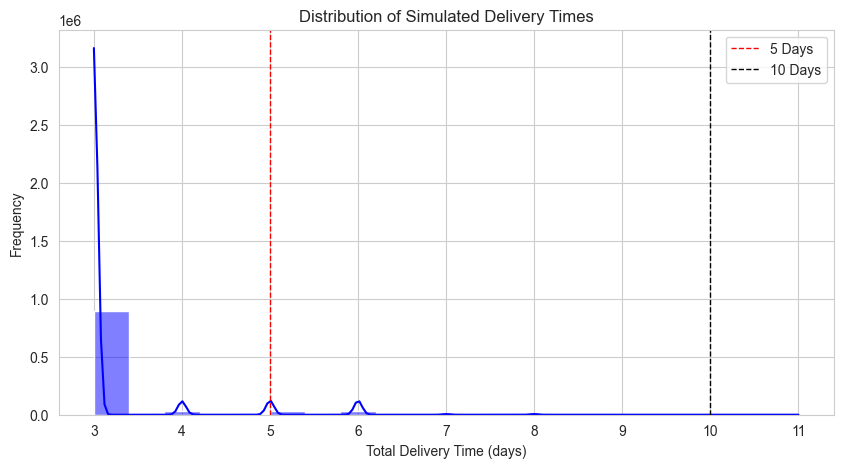

In [31]:
# Visualization
plt.figure(figsize=(10,5))
sns.histplot(delivery_times, bins=20, kde=True, color='blue')
plt.axvline(5, color='red', linestyle='dashed', linewidth=1, label='5 Days')
plt.axvline(10, color='black', linestyle='dashed', linewidth=1, label='10 Days')
plt.xlabel('Total Delivery Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Simulated Delivery Times')
plt.legend()
plt.show()